In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (20.0, 10.0)
plt.style.use('ggplot')
import numpy as np

In [2]:
CAREER_LENGTH = 5

In [3]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-'+ str(CAREER_LENGTH) + '-year_extended.csv', encoding='utf-8')

In [4]:
credible_authors = credible_authors.set_index('author')

In [5]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender
author,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,1,5.0,2,25.0,none
a aart blokhuis,1992,2005,2,14,1,0.0,0,0.0,none
a min tjoa,1979,2017,191,39,1,0.0,0,799.0,none
a-imam al-sammak,1992,2006,3,15,1,0.0,0,0.0,m
a-long jin,2011,2016,9,6,1,0.0,0,19.0,none


In [6]:
years = credible_authors.start_year.unique()

In [7]:
for year in years:
    temp = credible_authors[credible_authors.start_year == year]
    medi = temp.final_citation_count.median()
    credible_authors.loc[credible_authors.start_year == year, 'successful'] = credible_authors.loc[
        credible_authors.start_year == year, 'final_citation_count'].apply(lambda x: 1 if x >= medi else 0)

In [8]:
test_start_year = 1998

In [9]:
credible_test = credible_authors[credible_authors.start_year == test_start_year]

In [10]:
credible_test.head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful
author,,,,,,,,,,
a-xing zhu,1998,2017,22,20,1,0.0,0,89.0,none,1.0
a. aguado,1998,2002,2,5,1,3.0,2,15.0,m,0.0
a. amin,1998,2009,4,12,3,2.0,0,9.0,none,0.0
a. bartels,1998,2014,2,17,1,0.0,0,0.0,m,0.0
a. c. verschueren,1998,2002,2,5,1,0.0,0,1.0,m,0.0


In [11]:
colors = credible_test.successful.apply(lambda x: 'black' if x==1 else 'white')

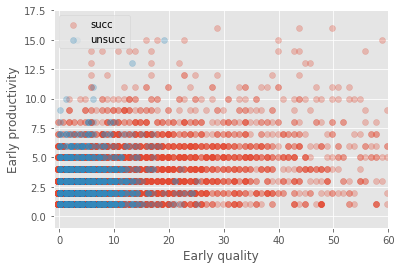

In [12]:
plt.scatter(credible_test[credible_test.successful == 1].early_career_qual - 0.2, 
            credible_test[credible_test.successful == 1].early_career_prod, label='succ', alpha=0.3) #, color=colors)
plt.scatter(credible_test[credible_test.successful == 0].early_career_qual + 0.2, 
            credible_test[credible_test.successful == 0].early_career_prod, label='unsucc', alpha=0.3) #, color=colors)
plt.xlabel('Early quality')
plt.ylabel('Early productivity')
plt.ylim((-1,17.5))
plt.xlim((-1,60))
plt.legend()
plt.show()

## Correlation testing

In [13]:
np.corrcoef(credible_test.early_career_qual, credible_test.final_citation_count)

array([[1.        , 0.51130241],
       [0.51130241, 1.        ]])

In [14]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_test.early_career_qual, credible_test.final_citation_count)

(0.5113024109958744, 0.0)

In [15]:
np.corrcoef(credible_authors.early_career_qual, credible_authors.final_citation_count)

array([[1.        , 0.25772612],
       [0.25772612, 1.        ]])

In [16]:
from scipy.stats.stats import pearsonr   
pearsonr(credible_authors.early_career_qual, credible_authors.final_citation_count)

(0.25772611507575777, 0.0)

## Citations over the years

In [17]:
citations_year_auth = pd.read_csv('./data/authors-perYear-citations-atleast-5-year.csv')

In [18]:
all_cited_authors = citations_year_auth.author.unique()

In [19]:
citations_year_auth = citations_year_auth.sort_values(by=['author', 'year_cit'])

In [20]:
# for cited_author in all_cited_authors:
#     citations_year_auth.loc[citations_year_auth.author == cited_author, 'cum_cit_count'] = citations_year_auth.loc[
#         citations_year_auth.author == cited_author,'cit_count'].cumsum()

In [21]:
citations_year_auth['cum_cit_count'] = citations_year_auth.groupby('author')['cit_count'].transform(pd.Series.cumsum)

In [22]:
citations_year_auth.head()

,author,year_cit,cit_count,cum_cit_count
0,'maseka lesaoana,2002,1,1
1,'maseka lesaoana,2003,1,2
2,'maseka lesaoana,2004,1,3
3,'maseka lesaoana,2005,2,5
4,'maseka lesaoana,2006,4,9


In [23]:
final_citation_count = credible_authors['final_citation_count']

In [24]:
final_citation_count.head()

author
'maseka lesaoana     25.0
a aart blokhuis       0.0
a min tjoa          799.0
a-imam al-sammak      0.0
a-long jin           19.0
Name: final_citation_count, dtype: float64

In [25]:
citations_year_auth['cum_cit_percent'] = citations_year_auth.apply(
    lambda row: row.cum_cit_count*100.0/final_citation_count[row.author], axis=1)

In [26]:
citations_year_auth['cit_percent'] = citations_year_auth.apply(
    lambda row: row.cit_count*100.0/final_citation_count[row.author], axis=1)

In [28]:
# credible_authors = credible_authors.set_index('author')
credible_authors['citation_percentage_list'] = citations_year_auth.groupby('author')['cit_percent'].apply(list)
credible_authors['cum_citation_percentage_list'] = citations_year_auth.groupby('author')['cum_cit_percent'].apply(list)

In [29]:
credible_authors['years_cited_list'] = citations_year_auth.groupby('author')['year_cit'].apply(list)

In [30]:
credible_authors.head()

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful,citation_percentage_list,cum_citation_percentage_list,years_cited_list
author,,,,,,,,,,,,,
'maseka lesaoana,2001,2015,2,15,1,5.0,2,25.0,none,0.0,"[4.0, 4.0, 4.0, 8.0, 16.0, 4.0, 12.0, 4.0, 4.0...","[4.0, 8.0, 12.0, 20.0, 36.0, 40.0, 52.0, 56.0,...","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200..."
a aart blokhuis,1992,2005,2,14,1,0.0,0,0.0,none,0.0,NaN,NaN,NaN
a min tjoa,1979,2017,191,39,1,0.0,0,799.0,none,1.0,"[0.2503128911138924, 0.1251564455569462, 0.500...","[0.2503128911138924, 0.37546933667083854, 0.87...","[1993, 1994, 1995, 1996, 1997, 1998, 1999, 200..."
a-imam al-sammak,1992,2006,3,15,1,0.0,0,0.0,m,0.0,NaN,NaN,NaN
a-long jin,2011,2016,9,6,1,0.0,0,19.0,none,1.0,"[15.789473684210526, 57.89473684210526, 26.315...","[15.789473684210526, 73.6842105263158, 100.0]","[2015, 2016, 2017]"


In [ ]:
test_start_year = 

In [32]:
credible_cited_authors = credible_authors.dropna(subset=['years_cited_list'])

In [33]:
credible_cited_authors_test = credible_cited_authors[credible_cited_authors.start_year == test_start_year]

In [34]:
# credible_cited_authors_test = credible_cited_authors_test[credible_cited_authors_test.successful == 1]

In [35]:
credible_cited_authors_test['relative_succ'] = credible_cited_authors_test.final_citation_count**2 / credible_cited_authors_test.final_citation_count.max()**2

/home/danielkostic/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
credible_cited_authors_test[credible_cited_authors_test.relative_succ > 0.1]

,start_year,end_year,num_pub,career_length,early_career_prod,early_career_qual,early_career_rec,final_citation_count,gender,successful,citation_percentage_list,cum_citation_percentage_list,years_cited_list,relative_succ
author,,,,,,,,,,,,,,
aaron hertzmann,1998,2017,82,20,6,111.0,10,5274.0,m,1.0,"[0.018960940462646948, 0.17064846416382254, 0....","[0.018960940462646948, 0.18960940462646947, 0....","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...",0.192134
albrecht schmidt 1,1998,2017,339,20,16,127.0,35,5287.0,m,1.0,"[0.2648004539436353, 0.397200680915453, 0.9268...","[0.2648004539436353, 0.6620011348590883, 1.588...","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...",0.193083
alejandro f. frangi,1998,2017,220,20,3,31.0,5,4178.0,m,1.0,"[0.07180469123982768, 0.04786979415988511, 0.4...","[0.07180469123982768, 0.11967448539971279, 0.5...","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...",0.120576
alex bateman,1998,2017,69,20,5,151.0,44,4307.0,none,1.0,"[0.06965405154399815, 0.3018342233573253, 0.65...","[0.06965405154399815, 0.3714882749013234, 1.02...","[1998, 1999, 2000, 2001, 2002, 2003, 2004, 200...",0.128137
andrew sendonaris,1998,2017,6,20,2,18.0,7,4707.0,none,1.0,"[0.04248990864669641, 0.10622477161674103, 0.1...","[0.04248990864669641, 0.14871468026343743, 0.2...","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...",0.153043
anna c. gilbert,1998,2017,62,20,4,140.0,46,4504.0,f,1.0,"[0.06660746003552398, 0.3552397868561279, 0.59...","[0.06660746003552398, 0.4218472468916519, 1.02...","[1998, 1999, 2000, 2001, 2002, 2003, 2004, 200...",0.140127
carlos guestrin,1998,2016,122,19,3,3.0,1,6383.0,m,1.0,"[0.015666614444618518, 0.4386652044493185, 0.3...","[0.015666614444618518, 0.45433181889393703, 0....","[2000, 2002, 2003, 2004, 2005, 2006, 2007, 200...",0.281432
changshui zhang,1998,2017,287,20,2,3.0,1,4877.0,none,1.0,"[0.02050440844781628, 0.04100881689563256, 0.0...","[0.02050440844781628, 0.061513225343448844, 0....","[1999, 2001, 2002, 2003, 2004, 2005, 2006, 200...",0.164297
chris stauffer,1998,2016,18,19,4,152.0,57,4456.0,m,1.0,"[0.4488330341113106, 0.8303411131059246, 1.009...","[0.4488330341113106, 1.279174147217235, 2.2890...","[1999, 2000, 2001, 2002, 2003, 2004, 2005, 200...",0.137156


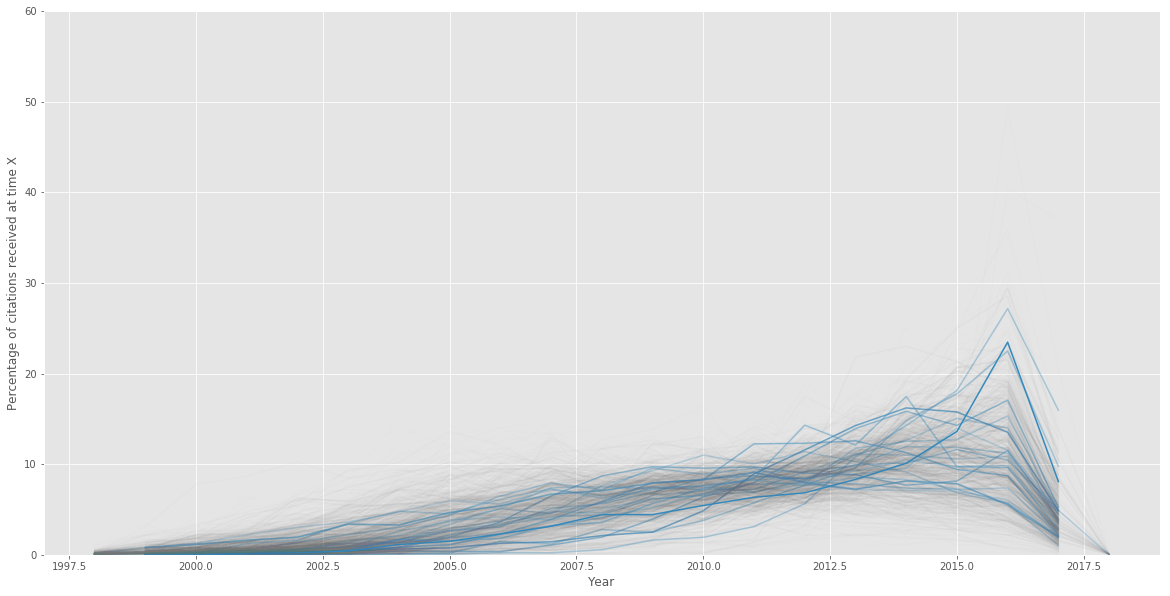

In [57]:
for author in credible_cited_authors_test.itertuples():
    if author.relative_succ <= 0.1:
        line_color = 'C3'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
    if author.relative_succ > 0.2:
        line_color = 'C1'
        plt.plot(author.years_cited_list, author.citation_percentage_list, line_color, alpha=author.relative_succ)
plt.xlabel('Year')
plt.ylabel('Percentage of citations received at time X')
plt.ylim((0, 60))
plt.show()

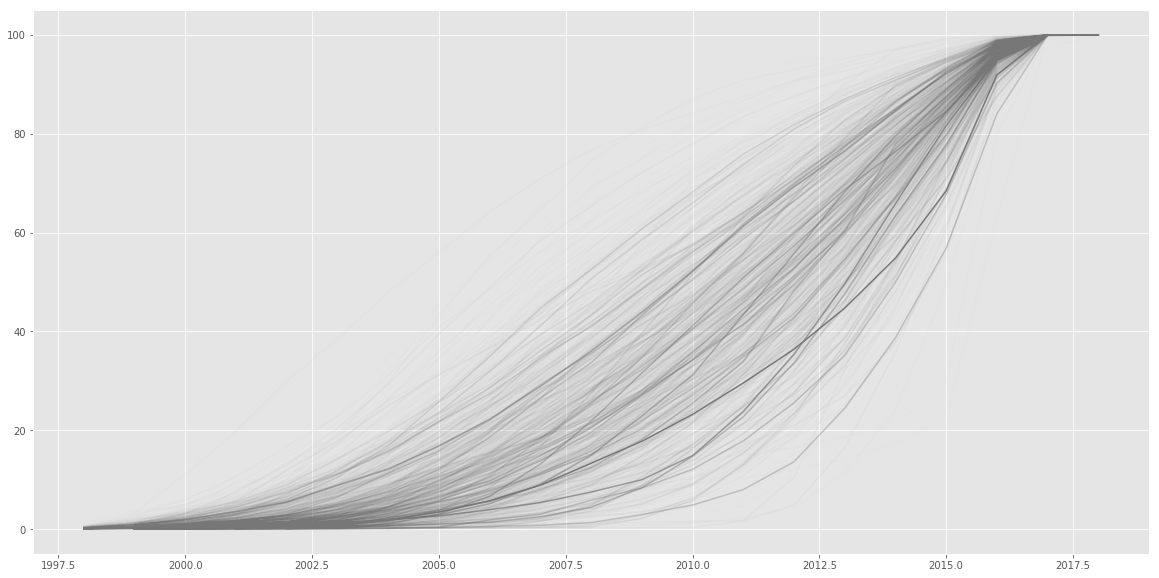

In [56]:
for author in credible_cited_authors_test.itertuples():
    plt.plot(author.years_cited_list, author.cum_citation_percentage_list, 'C3', alpha=author.relative_succ)
plt.show()